In [1]:
import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils
plotting.setup_mpl()
ff1.Cache.enable_cache('cache/')
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
pio.templates.default = "plotly_dark"
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

NotADirectoryError: Cache directory does not exist! Please check for typos or create it first.

In [ ]:
year = 2022
gp_round = 5
ses = 'FP3'

In [ ]:
driver_1 = 'LEC'
driver_2 = 'PER'

In [ ]:
events_list = ff1.get_event_schedule(2022)[2:]

session = ff1.get_session(year, gp_round, ses)
session.load(weather=True, telemetry=True)

core           INFO 	Loading data for Miami Grand Prix - Practice 3 [v2.2.8]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '55', '47', '44', '31', '24', '23', '22', '20', '18', '16', '14', '11', '10', '6', '5', '4', '3', '63', '77']


In [ ]:
events_list

,RoundNumber,Country,Location,OfficialEventName,EventDate,EventName,EventFormat,Session1,Session1Date,Session2,Session2Date,Session3,Session3Date,Session4,Session4Date,Session5,Session5Date,F1ApiSupport
2,1,Bahrain,Sakhir,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2022,2022-03-20 20:00:00,Bahrain Grand Prix,conventional,Practice 1,2022-03-18 15:00:00,Practice 2,2022-03-18 18:00:00,Practice 3,2022-03-19 15:00:00,Qualifying,2022-03-19 18:00:00,Race,2022-03-20 18:00:00,True
3,2,Saudi Arabia,Jeddah,FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2022,2022-03-27 22:00:00,Saudi Arabian Grand Prix,conventional,Practice 1,2022-03-25 17:00:00,Practice 2,2022-03-25 20:00:00,Practice 3,2022-03-26 17:00:00,Qualifying,2022-03-26 20:00:00,Race,2022-03-27 20:00:00,True
4,3,Australia,Melbourne,FORMULA 1 HEINEKEN AUSTRALIAN GRAND PRIX 2022,2022-04-10 17:00:00,Australian Grand Prix,conventional,Practice 1,2022-04-08 13:00:00,Practice 2,2022-04-08 16:00:00,Practice 3,2022-04-09 13:00:00,Qualifying,2022-04-09 16:00:00,Race,2022-04-10 15:00:00,True
5,4,Italy,Imola,FORMULA 1 ROLEX GRAN PREMIO DEL MADE IN ITALY E DELL'EMILIA-ROMAGNA 2022,2022-04-24 17:00:00,Emilia Romagna Grand Prix,sprint,Practice 1,2022-04-22 13:30:00,Qualifying,2022-04-22 17:00:00,Practice 2,2022-04-23 12:30:00,Sprint,2022-04-23 16:30:00,Race,2022-04-24 15:00:00,True
6,5,United States,Miami,FORMULA 1 CRYPTO.COM MIAMI GRAND PRIX 2022,2022-05-08 17:30:00,Miami Grand Prix,conventional,Practice 1,2022-05-06 14:30:00,Practice 2,2022-05-06 17:30:00,Practice 3,2022-05-07 13:00:00,Qualifying,2022-05-07 16:00:00,Race,2022-05-08 15:30:00,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,18,Japan,Suzuka,FORMULA 1 JAPANESE GRAND PRIX 2022,2022-10-09 16:00:00,Japanese Grand Prix,conventional,Practice 1,2022-10-07 13:00:00,Practice 2,2022-10-07 16:00:00,Practice 3,2022-10-08 13:00:00,Qualifying,2022-10-08 16:00:00,Race,2022-10-09 14:00:00,True
20,19,United States,Austin,FORMULA 1 ARAMCO UNITED STATES GRAND PRIX 2022,2022-10-23 16:00:00,United States Grand Prix,conventional,Practice 1,2022-10-21 14:00:00,Practice 2,2022-10-21 17:00:00,Practice 3,2022-10-22 14:00:00,Qualifying,2022-10-22 17:00:00,Race,2022-10-23 14:00:00,True
21,20,Mexico,Mexico City,FORMULA 1 GRAN PREMIO DE LA CIUDAD DE MÉXICO 2022,2022-10-30 16:00:00,Mexico City Grand Prix,conventional,Practice 1,2022-10-28 13:00:00,Practice 2,2022-10-28 16:00:00,Practice 3,2022-10-29 12:00:00,Qualifying,2022-10-29 15:00:00,Race,2022-10-30 14:00:00,True
22,21,Brazil,São Paulo,FORMULA 1 HEINEKEN GRANDE PRÊMIO DE SÃO PAULO 2022,2022-11-13 17:00:00,São Paulo Grand Prix,sprint,Practice 1,2022-11-11 12:30:00,Qualifying,2022-11-11 16:00:00,Practice 2,2022-11-12 12:30:00,Sprint,2022-11-12 16:30:00,Race,2022-11-13 15:00:00,True


In [ ]:
session.results

,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
1,1,M VERSTAPPEN,VER,Red Bull Racing,1e5bc6,Max,Verstappen,Max Verstappen,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
55,55,C SAINZ,SAI,Ferrari,ed1c24,Carlos,Sainz,Carlos Sainz,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
47,47,M SCHUMACHER,MSC,Haas F1 Team,b6babd,Mick,Schumacher,Mick Schumacher,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
44,44,L HAMILTON,HAM,Mercedes,6cd3bf,Lewis,Hamilton,Lewis Hamilton,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
31,31,E OCON,OCO,Alpine,2293d1,Esteban,Ocon,Esteban Ocon,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,5,S VETTEL,VET,Aston Martin,2d826d,Sebastian,Vettel,Sebastian Vettel,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
4,4,L NORRIS,NOR,McLaren,f58020,Lando,Norris,Lando Norris,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
3,3,D RICCIARDO,RIC,McLaren,f58020,Daniel,Ricciardo,Daniel Ricciardo,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
63,63,G RUSSELL,RUS,Mercedes,6cd3bf,George,Russell,George Russell,0.0,0.0,NaT,NaT,NaT,NaT,,0.0


In [ ]:
fastest_lap = session.laps.pick_fastest()
tel = fastest_lap.telemetry
tel

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2022-05-07 17:53:53.960,0 days 01:08:53.904000,,2222.175556,0 days 00:00:00,11570,290,7,100,False,12,interpolation,0.229136,0.000043,OnTrack,1783,162,249
3,2022-05-07 17:53:53.994,0 days 01:08:53.938000,,2222.175556,0 days 00:00:00.034000,11600,292,7,100,False,12,car,3.002778,0.000561,OnTrack,1807,147,249
4,2022-05-07 17:53:54.126,0 days 01:08:54.070000,,2222.175556,0 days 00:00:00.166000,11645,294,7,100,False,12,pos,13.843639,0.002586,OnTrack,1898,90,250
5,2022-05-07 17:53:54.194,0 days 01:08:54.138000,16,2222.175556,0 days 00:00:00.234000,11691,296,7,100,False,12,car,19.447222,0.003633,OnTrack,1944,60,250
6,2022-05-07 17:53:54.287,0 days 01:08:54.231000,16,2220.982963,0 days 00:00:00.327000,11319,296,7,100,False,12,pos,27.111904,0.005065,OnTrack,2009,20,250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,2022-05-07 17:55:23.627,0 days 01:10:23.571000,1,2041.923056,0 days 00:01:29.667000,11353,283,7,100,False,12,pos,5283.846070,0.987171,OnTrack,1407,368,248
690,2022-05-07 17:55:23.753,0 days 01:10:23.697000,1,2037.669722,0 days 00:01:29.793000,11395,285,7,100,False,12,car,5293.876667,0.989045,OnTrack,1528,308,248
691,2022-05-07 17:55:23.887,0 days 01:10:23.831000,1,2031.821806,0 days 00:01:29.927000,11500,288,7,100,False,12,pos,5304.632904,0.991055,OnTrack,1675,231,249
692,2022-05-07 17:55:24.154,0 days 01:10:24.098000,1,2025.973889,0 days 00:01:30.194000,11606,291,7,100,False,12,car,5326.290833,0.995101,OnTrack,1850,130,249


In [ ]:
session_weather = session.weather_data
session_weather

,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed
0,0 days 00:00:27.444000,32.9,44.0,1010.7,False,49.4,86,1.2
1,0 days 00:01:27.448000,33.0,44.0,1010.7,False,48.1,77,2.0
2,0 days 00:02:27.448000,32.8,45.0,1010.5,False,47.6,185,1.8
3,0 days 00:03:27.460000,32.6,46.0,1010.5,False,48.4,183,1.8
4,0 days 00:04:27.475000,32.6,46.0,1010.5,False,49.7,108,2.4
...,...,...,...,...,...,...,...,...
77,0 days 01:17:27.699000,33.4,42.0,1010.2,False,47.6,344,1.5
78,0 days 01:18:27.700000,33.3,43.0,1010.0,False,47.8,337,1.7
79,0 days 01:19:27.697000,33.3,43.0,1010.2,False,47.8,343,1.2
80,0 days 01:20:27.700000,33.3,43.0,1010.2,False,48.5,194,1.0


In [ ]:
# Function to format timedelta Series as string if necessary
def format_time(timedelta_series):
    t_list_str = []
    for i in timedelta_series:
        i = str(i)
        t_list_str.append(i[10:-3])
        
    return t_list_str

In [ ]:
fastest_driver_1 = session.laps.pick_driver(driver_1).pick_fastest()
fastest_driver_2 = session.laps.pick_driver(driver_2).pick_fastest()

In [ ]:
car_data_1 = fastest_driver_1.get_car_data().add_distance()
car_data_1['Distance'] = round(car_data_1['Distance'])
car_data_2 = fastest_driver_2.get_car_data().add_distance()
car_data_2['Distance'] = round(car_data_2['Distance'])
# t_list_lec = format_time(t_lec)
# t_list_msc = format_time(t_msc)

In [ ]:
delta_time, ref_tel, compare_tel = utils.delta_time(fastest_driver_1, fastest_driver_2)
plot_title = f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1} vs {driver_2}"

In [ ]:
hovertemplate_speed = 'Speed: %{y} km/h'+'<br>Distance: %{x} meters'
hovertemplate_gear = 'Gear: %{y}'+'<br>Distance: %{x} meters'
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(x=car_data_1['Distance'], y=car_data_1['Speed'], name=driver_1, line_color=ff1.plotting.driver_color(driver_1), hovertemplate = hovertemplate_speed, opacity=0.8), secondary_y=False)
fig.add_trace(go.Scatter(x=car_data_2['Distance'], y=car_data_2['Speed'], name=driver_2, line_color=ff1.plotting.driver_color(driver_2), hovertemplate = hovertemplate_speed, opacity=0.8), secondary_y=False)
fig.add_trace(go.Scatter(x=ref_tel['Distance'], y=delta_time, line_color='white', name='Delta Time', hovertemplate = 'Delta Time: %{y:.3f} sec', opacity=0.8, line_width=1), secondary_y=True)

fig.update_yaxes(title_text="Speed (km/h)", secondary_y=False)
fig.update_yaxes(title_text=f"<-- {driver_2} ahead | {driver_1} ahead -->", secondary_y=True)
fig.update_layout(width=1000, height=600, title_text=plot_title, xaxis_title='Distance (m)', title_x=0.5)
fig.show()

In [ ]:
fig = make_subplots(rows=3, cols=1, shared_xaxes=True, subplot_titles=('Speed', 'Gear', 'Delta Time'), vertical_spacing=0.1)

fig.append_trace(go.Scatter(x=car_data_1['Distance'], y=car_data_1['Speed'], name=driver_1, line_color=ff1.plotting.driver_color(driver_1), hovertemplate = hovertemplate_speed, opacity=0.8), 1, 1)
fig.append_trace(go.Scatter(x=car_data_2['Distance'], y=car_data_2['Speed'], name=driver_2, line_color=ff1.plotting.driver_color(driver_2), hovertemplate = hovertemplate_speed, opacity=0.8), 1, 1)

fig.append_trace(go.Scatter(x=car_data_1['Distance'], y=car_data_1['nGear'], name=driver_1, line_color=ff1.plotting.driver_color(driver_1), hovertemplate = hovertemplate_gear, opacity=0.8, showlegend=False), 2, 1)
fig.append_trace(go.Scatter(x=car_data_2['Distance'], y=car_data_2['nGear'], name=driver_2, line_color=ff1.plotting.driver_color(driver_2), hovertemplate = hovertemplate_gear, opacity=0.8, showlegend=False), 2, 1)

fig.append_trace(go.Scatter(x=ref_tel['Distance'], y=delta_time, line_color='white', mode='lines', name='Delta Time', hovertemplate = 'Delta Time: %{y:.3f} sec', opacity=0.8), 3, 1)

fig.update_yaxes(title_text="Speed (km/h)", row=1, col=1)
fig.update_yaxes(title_text="Gear", row=2, col=1)
fig.update_yaxes(title_text=f"<-- {driver_2} ahead | {driver_1} ahead -->", row=3, col=1)
fig.update_xaxes(title_text="Distance (m)", row=3, col=1)

fig.update_layout(width=1200, height=1200, title_text=plot_title, title_x=0.1)
fig.show()

In [ ]:
# Returns only laps quicker than 107% of the quickest lap of the session, removing outlaps and inlaps.
session.laps.pick_quicklaps()

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
1,0 days 00:18:18.461000,1,0 days 00:01:34.037000,2,1,NaT,NaT,0 days 00:00:31.547000,0 days 00:00:35.663000,0 days 00:00:26.827000,...,False,MEDIUM,NaN,True,0 days 00:16:44.424000,Red Bull Racing,VER,1,True,2022-05-07 17:01:44.480
3,0 days 00:21:55.249000,1,0 days 00:01:32.447000,4,1,NaT,NaT,0 days 00:00:30.931000,0 days 00:00:35.402000,0 days 00:00:26.114000,...,False,MEDIUM,NaN,True,0 days 00:20:22.802000,Red Bull Racing,VER,1,True,2022-05-07 17:05:22.858
5,0 days 00:25:30.820000,1,0 days 00:01:31.355000,6,1,NaT,NaT,0 days 00:00:30.449000,0 days 00:00:34.946000,0 days 00:00:25.960000,...,False,MEDIUM,NaN,True,0 days 00:23:59.465000,Red Bull Racing,VER,1,True,2022-05-07 17:08:59.521
8,0 days 00:45:29.333000,1,0 days 00:01:34.869000,9,2,NaT,NaT,0 days 00:00:31.808000,0 days 00:00:35.893000,0 days 00:00:27.168000,...,False,MEDIUM,10.0,False,0 days 00:43:54.464000,Red Bull Racing,VER,1,True,2022-05-07 17:28:54.520
9,0 days 00:47:05.171000,1,0 days 00:01:35.838000,10,2,NaT,NaT,0 days 00:00:32.002000,0 days 00:00:36.851000,0 days 00:00:26.985000,...,False,MEDIUM,11.0,False,0 days 00:45:29.333000,Red Bull Racing,VER,1,True,2022-05-07 17:30:29.389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,0 days 00:53:11.853000,77,0 days 00:01:32.211000,14,3,NaT,NaT,0 days 00:00:30.916000,0 days 00:00:35.219000,0 days 00:00:26.076000,...,False,SOFT,7.0,True,0 days 00:51:39.642000,Alfa Romeo,BOT,1,True,2022-05-07 17:36:39.698
374,0 days 00:58:31.712000,77,0 days 00:01:31.904000,17,3,NaT,NaT,0 days 00:00:30.732000,0 days 00:00:34.978000,0 days 00:00:26.194000,...,False,SOFT,10.0,True,0 days 00:56:59.808000,Alfa Romeo,BOT,1,True,2022-05-07 17:41:59.864
377,0 days 01:09:38.478000,77,0 days 00:01:34.038000,20,4,NaT,NaT,0 days 00:00:31.680000,0 days 00:00:35.776000,0 days 00:00:26.582000,...,False,SOFT,14.0,None,0 days 01:08:04.440000,Alfa Romeo,BOT,1,True,2022-05-07 17:53:04.496
378,0 days 01:11:13.304000,77,0 days 00:01:34.826000,21,4,NaT,NaT,0 days 00:00:31.858000,0 days 00:00:36.163000,0 days 00:00:26.805000,...,False,SOFT,15.0,None,0 days 01:09:38.478000,Alfa Romeo,BOT,1,True,2022-05-07 17:54:38.534


In [ ]:
lap_1 = fastest_driver_1.telemetry
lap_1

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2022-05-07 17:58:33.624,0 days 01:13:33.568000,,1088.778333,0 days 00:00:00,11441,284,7,99,False,12,interpolation,0.347295,0.000065,OnTrack,1829,134,249
3,2022-05-07 17:58:33.627,0 days 01:13:33.571000,,1088.778333,0 days 00:00:00.003000,11483,285,7,99,False,12,pos,0.587597,0.000110,OnTrack,1831,133,250
4,2022-05-07 17:58:33.754,0 days 01:13:33.698000,,1088.778333,0 days 00:00:00.130000,11566,287,7,99,False,12,car,10.794444,0.002026,OnTrack,1909,82,250
5,2022-05-07 17:58:33.927,0 days 01:13:33.871000,,1088.778333,0 days 00:00:00.303000,11203,290,7,99,False,12,pos,24.805542,0.004656,OnTrack,2035,4,250
6,2022-05-07 17:58:34.194,0 days 01:13:34.138000,22,1088.778333,0 days 00:00:00.570000,10840,293,7,99,False,12,car,46.605556,0.008748,OnTrack,2314,-171,250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,2022-05-07 18:00:03.746,0 days 01:15:03.690000,22,685.091296,0 days 00:01:30.122000,11350,281,7,99,False,12,pos,5294.782950,0.993902,OnTrack,1571,289,249
682,2022-05-07 18:00:03.867,0 days 01:15:03.811000,22,678.654259,0 days 00:01:30.243000,11420,282,7,99,False,12,pos,5304.333426,0.995695,OnTrack,1659,240,249
683,2022-05-07 18:00:03.915,0 days 01:15:03.859000,22,672.217222,0 days 00:01:30.291000,11490,283,7,99,False,12,car,5308.136111,0.996408,OnTrack,1692,220,248
684,2022-05-07 18:00:04.026,0 days 01:15:03.970000,22,672.217222,0 days 00:01:30.402000,11523,285,7,99,False,12,pos,5316.960422,0.998065,OnTrack,1769,173,249


In [ ]:
colormap_speed = mpl.cm.RdYlGn
colormap_gear = mpl.cm.get_cmap('RdYlGn', 8)
points = np.array([lap_1['X'], lap_1['Y']]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
start_x = points[0][0][0]
start_y = points[0][0][1]
direction_x = start_x + 800
px = 1/plt.rcParams['figure.dpi']

In [ ]:
direction_x

2129

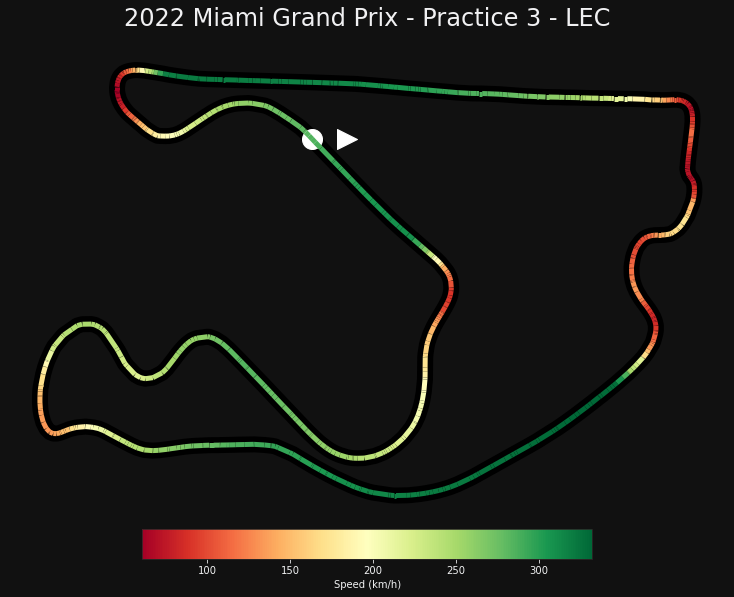

In [ ]:
# Setup plot
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(900*px, 600*px))
fig.suptitle(f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1}", size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

# After this, we plot the data itself.
# Create background track line
ax.plot(lap_1['X'], lap_1['Y'], color='black', linestyle='-', linewidth=16, zorder=1)

# Add start line marker
plt.scatter(start_x, start_y, color='white', s=400, zorder=1)
plt.scatter(direction_x, start_y, color='white', s=400, zorder=1, marker='>')

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(lap_1['Speed'].min(), lap_1['Speed'].max())
lc = LineCollection(segments, cmap=colormap_speed, norm=norm, linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(lap_1['Speed'])

# Merge all line segments together
line = ax.add_collection(lc)

# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=lap_1['Speed'].min(), vmax=lap_1['Speed'].max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap_speed, orientation="horizontal", label='Speed (km/h)')

# Set background color to transparent
# fig.patch.set_alpha(0)
fig.patch.set_facecolor('#111111')

# Show the plot
plt.show()

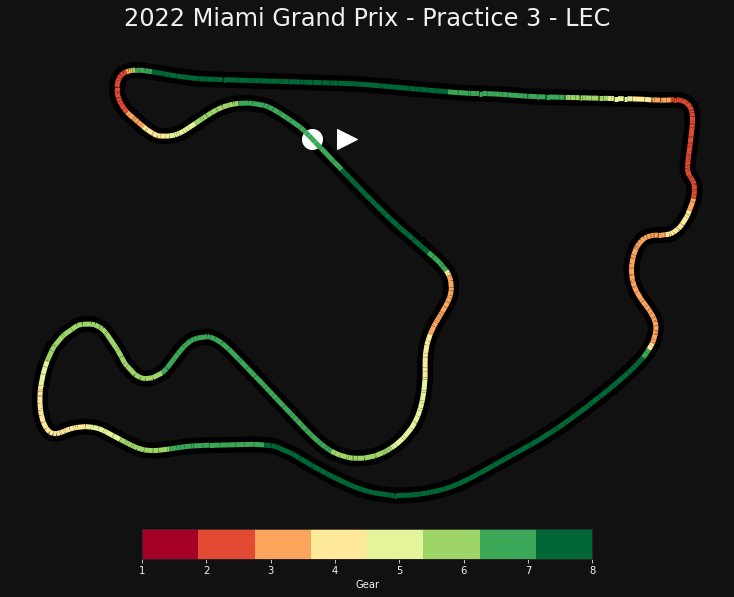

In [ ]:
# Setup plot
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(900*px, 600*px))
fig.suptitle(f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1}", size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

# After this, we plot the data itself.
# Create background track line
ax.plot(lap_1['X'], lap_1['Y'], color='black', linestyle='-', linewidth=16, zorder=1)

# Add start line marker
plt.scatter(start_x, start_y, color='white', s=400, zorder=1)
plt.scatter(direction_x, start_y, color='white', s=400, zorder=1, marker='>')

# Create a norm to map from data points to colors
norm = plt.Normalize(1, colormap_gear.N+1)
lc = LineCollection(segments, cmap=colormap_gear, norm=norm, linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(lap_1['nGear'].to_numpy().astype(float))

# Merge all line segments together
line = ax.add_collection(lc)

# Create a color bar as a legend
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=1, vmax=8)
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap_gear, orientation="horizontal", label='Gear')

# Set background color to transparent
# fig.patch.set_alpha(0)
fig.patch.set_facecolor('#111111')

# Show the plot
plt.show()

In [ ]:
def delta_bounds(vmin, vmax):
    if abs(vmin) < abs(vmax):
        vmin = -(vmax)
        return vmin, vmax
    else:
        vmax = -(vmin)
        return vmin, vmax

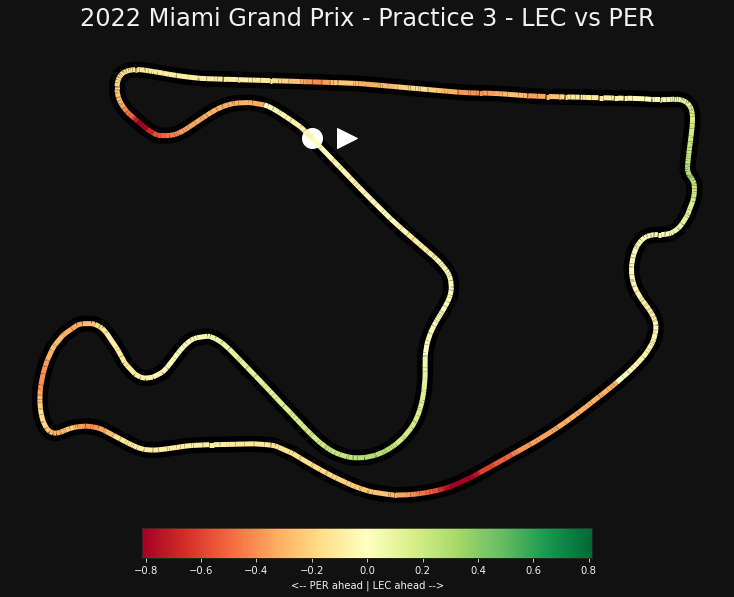

In [ ]:
# Determine boundaries for the colorbar
vmin, vmax = delta_bounds(delta_time.min(), delta_time.max())

# Setup plot
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(900*px, 600*px))
fig.suptitle(f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1} vs {driver_2}", size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

# After this, we plot the data itself.
# Create background track line
ax.plot(lap_1['X'], lap_1['Y'], color='black', linestyle='-', linewidth=16, zorder=1)

# Add start line marker
plt.scatter(start_x, start_y, color='white', s=400, zorder=1)
plt.scatter(direction_x, start_y, color='white', s=400, zorder=1, marker='>')

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(vmin, vmax)
lc = LineCollection(segments, cmap=colormap_speed, norm=norm, linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(delta_time)

# Merge all line segments together
line = ax.add_collection(lc)

# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap_speed, orientation="horizontal", label=f"<-- {driver_2} ahead | {driver_1} ahead -->")

# Set background color to transparent
# fig.patch.set_alpha(0)
fig.patch.set_facecolor('#111111')

# Show the plot
plt.show()

In [ ]:
delta_time

0      0.000000
1     -0.003493
2     -0.009371
3     -0.017266
4     -0.026617
         ...   
330   -0.313386
331   -0.315715
332   -0.317137
333   -0.323890
334   -0.328158
Name: Time, Length: 335, dtype: float64

In [ ]:
ref_tel

,Date,SessionTime,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,Distance
0,2022-05-07 17:58:33.624,0 days 01:13:33.568000,11442,284,7,99,False,12,interpolation,0 days 00:00:00,0.000000
1,2022-05-07 17:58:33.754,0 days 01:13:33.698000,11566,287,7,99,False,12,car,0 days 00:00:00.130000,10.363889
2,2022-05-07 17:58:34.194,0 days 01:13:34.138000,10840,293,7,99,False,12,car,0 days 00:00:00.570000,46.175000
3,2022-05-07 17:58:34.595,0 days 01:13:34.539000,10610,296,8,99,False,12,car,0 days 00:00:00.971000,79.146111
4,2022-05-07 17:58:34.955,0 days 01:13:34.899000,10704,300,8,99,False,12,car,0 days 00:00:01.331000,109.146111
...,...,...,...,...,...,...,...,...,...,...,...
330,2022-05-07 18:00:03.075,0 days 01:15:03.019000,11050,275,7,99,False,12,car,0 days 00:01:29.451000,5242.272222
331,2022-05-07 18:00:03.315,0 days 01:15:03.259000,11280,276,7,99,False,12,car,0 days 00:01:29.691000,5260.672222
332,2022-05-07 18:00:03.475,0 days 01:15:03.419000,11280,280,7,99,False,12,car,0 days 00:01:29.851000,5273.116667
333,2022-05-07 18:00:03.915,0 days 01:15:03.859000,11490,283,7,99,False,12,car,0 days 00:01:30.291000,5307.705556


In [ ]:
compare_tel

,Date,SessionTime,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,Distance
0,2022-05-07 17:53:53.960,0 days 01:08:53.904000,11541,288,7,100,False,12,interpolation,0 days 00:00:00,0.000000
1,2022-05-07 17:53:53.994,0 days 01:08:53.938000,11600,292,7,100,False,12,car,0 days 00:00:00.034000,2.757778
2,2022-05-07 17:53:54.194,0 days 01:08:54.138000,11691,296,7,100,False,12,car,0 days 00:00:00.234000,19.202222
3,2022-05-07 17:53:54.474,0 days 01:08:54.418000,10576,297,7,100,False,12,car,0 days 00:00:00.514000,42.302222
4,2022-05-07 17:53:54.674,0 days 01:08:54.618000,10845,299,8,100,False,12,car,0 days 00:00:00.714000,58.913333
...,...,...,...,...,...,...,...,...,...,...,...
336,2022-05-07 17:55:23.234,0 days 01:10:23.178000,11163,277,7,100,False,12,car,0 days 00:01:29.274000,5252.766389
337,2022-05-07 17:55:23.434,0 days 01:10:23.378000,11311,281,7,100,False,12,car,0 days 00:01:29.474000,5268.377500
338,2022-05-07 17:55:23.753,0 days 01:10:23.697000,11395,285,7,100,False,12,car,0 days 00:01:29.793000,5293.631667
339,2022-05-07 17:55:24.154,0 days 01:10:24.098000,11606,291,7,100,False,12,car,0 days 00:01:30.194000,5326.045833
